# **Applying ARIMA Model for time series forecasting**

## **Preparations:**

**Imports:**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

import logging
import timeforecastinghandler

from sklearn.metrics import mean_squared_error, mean_absolute_error

warnings.filterwarnings('ignore')

**Read the DataFrames:**

In [4]:
hd161 = pd.read_csv('./Data/hd161.csv', index_col=0)
hd110 = pd.read_csv('./Data/hd110.csv', index_col=0)
hd37 = pd.read_csv('./Data/hd37.csv', index_col=0)
hd88 = pd.read_csv('./Data/hd88.csv', index_col=0)

locations = pd.read_excel('./Data/locations_fully_classified.xlsx', index_col=0)

**Enrich the DataFrameStorage class**

In [6]:
dataFrameStorage = timeforecastinghandler.DataFrameStorage(hd161, hd110, hd37, hd88, locations)

**Generate TimeForecasting class**

In [8]:
timeSeriesForecaster = timeforecastinghandler.TimeSeriesForecaster(locations, dataFrameStorage)

**Get the DataFrame for a certain location**

In [10]:
df = timeSeriesForecaster.format_dataFrame(0)

## **Splitting the data in Training and Testing Data**

**Setting up train and test DataFrame, based on given split values:**

In [13]:
train_df, test_df = timeSeriesForecaster.get_train_and_test_split(99,1)

**Plotting the train and test data, based on train and test DataFrame:**

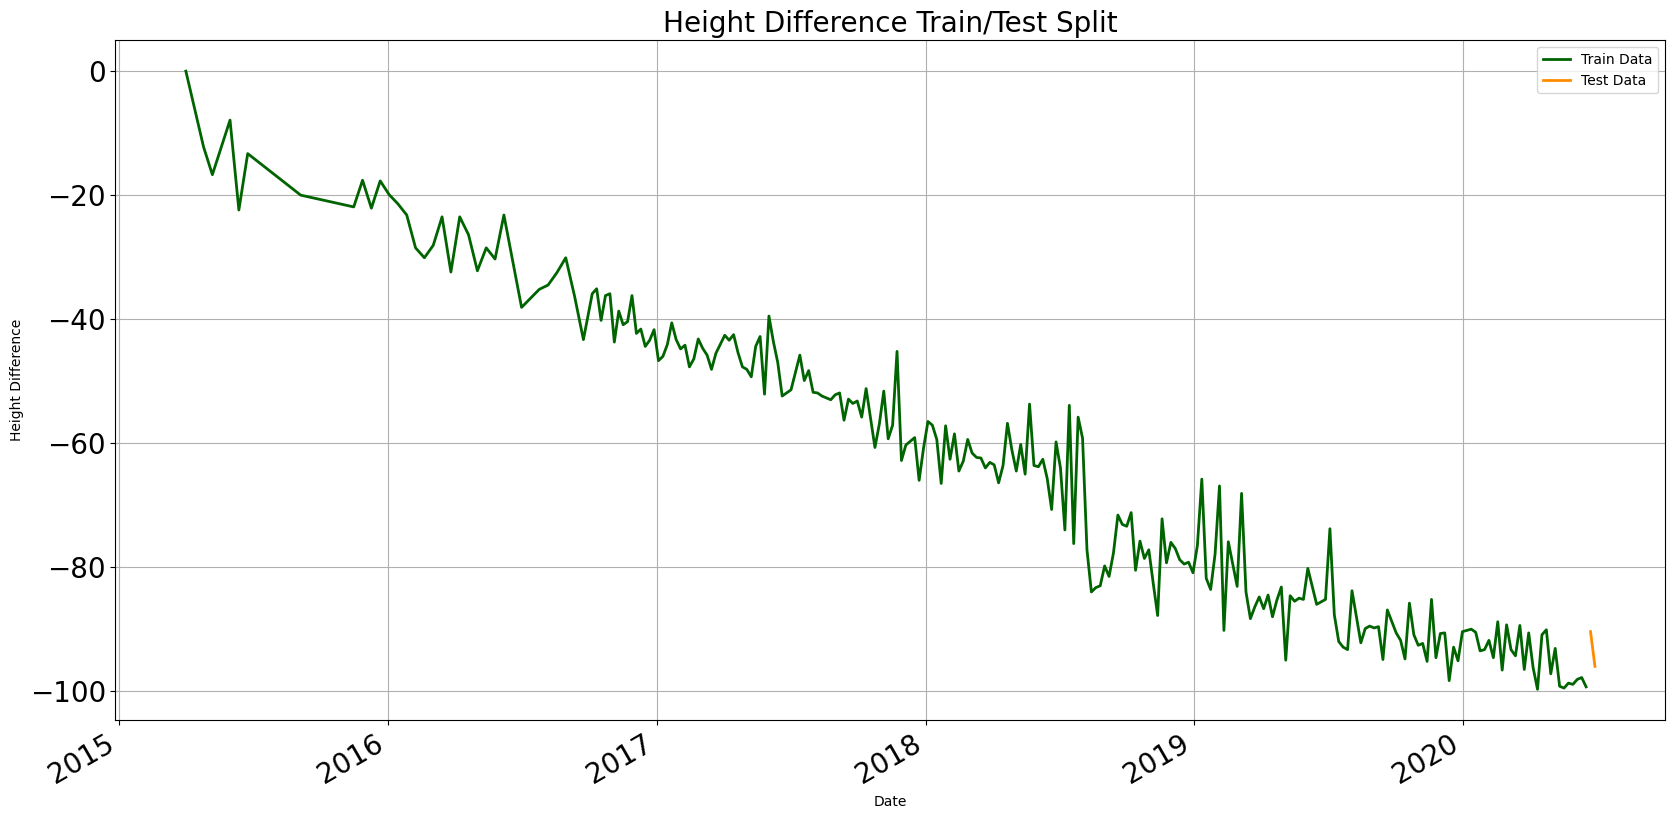

In [15]:
fig, _ = timeSeriesForecaster.plot_train_and_test_split(train_df, test_df)
fig.show()

## **Finding the best possible non-seasonal orders by applying a auto-ARIMA process**

In [17]:
predicted_test_vals = timeSeriesForecaster.get_predicted_values_from_model_without_seasonality()

MSE of: 33.821305627964776


The following model has a MSE of 33.82. This model does NOT include further external data and does NOT include seasonality.
The model order: (0, 1, 1) and seasonal-order: (0, 0, 0, 0)


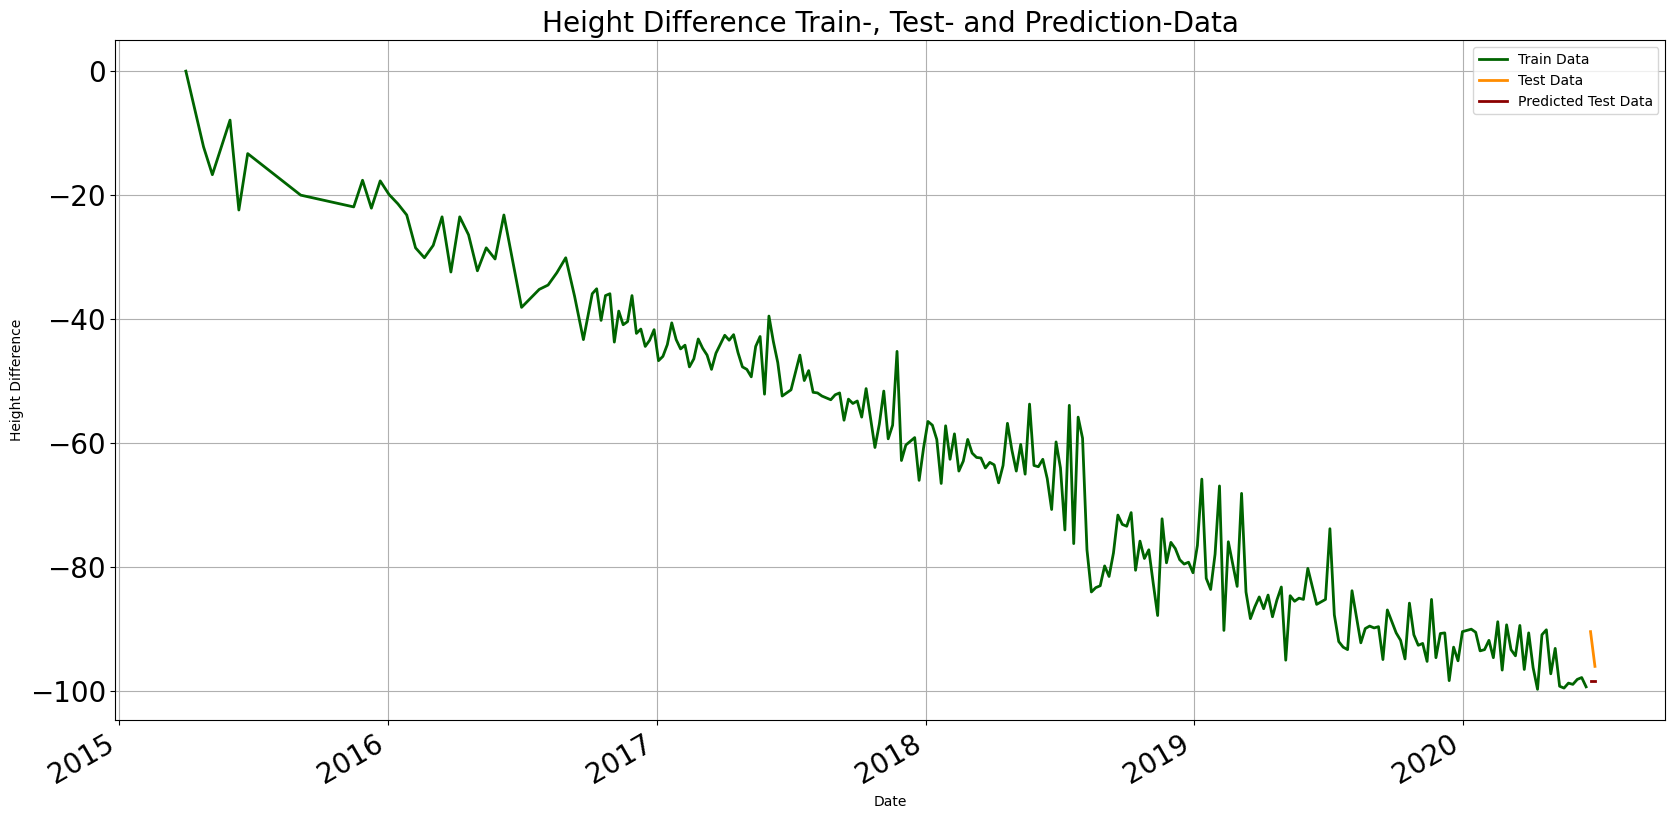

In [18]:
fig, _ = timeSeriesForecaster.plot_without_seasonality(predicted_test_vals)
fig.show()